In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing dataset
#dataset = pd.read_csv('/Users/mehakgagneja/Desktop/diabetic_data.csv')
dataset = pd.read_csv('C:/Users/Divsy/Documents/MPS Analytics Courses/Qtr3/Big_Data - ALY6110/diabetes+130+us+hospitals+for+years+1999+2008/dataset_diabetes/diabetic_data.csv')
print(dataset.head(5))

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [3]:
# Replacing '?' with most appropriate values
dataset['race'] = dataset['race'].replace('?','Other')
dataset['payer_code'] = dataset['payer_code'].replace('?','Other')
dataset['medical_specialty'] = dataset['medical_specialty'].replace('?','Other')

mode = dataset[dataset['weight']!='?']['weight'].mode()[0]
dataset['weight']=dataset['weight'].replace('?',mode)

print(dataset)

        encounter_id  patient_nbr             race  gender      age    weight  \
0            2278392      8222157        Caucasian  Female   [0-10)  [75-100)   
1             149190     55629189        Caucasian  Female  [10-20)  [75-100)   
2              64410     86047875  AfricanAmerican  Female  [20-30)  [75-100)   
3             500364     82442376        Caucasian    Male  [30-40)  [75-100)   
4              16680     42519267        Caucasian    Male  [40-50)  [75-100)   
...              ...          ...              ...     ...      ...       ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)  [75-100)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)  [75-100)   
101763     443854148     41088789        Caucasian    Male  [70-80)  [75-100)   
101764     443857166     31693671        Caucasian  Female  [80-90)  [75-100)   
101765     443867222    175429310        Caucasian    Male  [70-80)  [75-100)   

        admission_type_id  

In [14]:
# Making the target variable to a binary variable for building models
dataset.loc[(dataset['readmitted'] == '<30') | (dataset['readmitted'] == '>30'),'readmitted']= 'Yes'
print(dataset)

        encounter_id  patient_nbr             race  gender      age    weight  \
0            2278392      8222157        Caucasian  Female   [0-10)  [75-100)   
1             149190     55629189        Caucasian  Female  [10-20)  [75-100)   
2              64410     86047875  AfricanAmerican  Female  [20-30)  [75-100)   
3             500364     82442376        Caucasian    Male  [30-40)  [75-100)   
4              16680     42519267        Caucasian    Male  [40-50)  [75-100)   
...              ...          ...              ...     ...      ...       ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)  [75-100)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)  [75-100)   
101763     443854148     41088789        Caucasian    Male  [70-80)  [75-100)   
101764     443857166     31693671        Caucasian  Female  [80-90)  [75-100)   
101765     443867222    175429310        Caucasian    Male  [70-80)  [75-100)   

        admission_type_id  

In [17]:
# Label Encoding
all_categorical_variables = []
for each in dataset.columns:
    if 'object' in str(dataset[each].dtype):
        all_categorical_variables.append(each)

print(all_categorical_variables)

labelencoder = LabelEncoder()
dataset = dataset.copy()
for each in all_categorical_variables:
    dataset[each] = labelencoder.fit_transform(dataset[each])

[]


In [24]:
# Decision Tree Model
target = 'readmitted'

# Setting x and y for train and test sets
x = dataset.drop(['readmitted'], axis=1)
y = dataset['readmitted']

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Creating and fitting the decision tree model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
decision_tree.fit(x_train, y_train)

|--- feature_17 <= 0.50
|   |--- feature_1 <= 30523585.00
|   |   |--- feature_0 <= 58523520.00
|   |   |   |--- class: 0
|   |   |--- feature_0 >  58523520.00
|   |   |   |--- class: 0
|   |--- feature_1 >  30523585.00
|   |   |--- feature_0 <= 233849376.00
|   |   |   |--- class: 0
|   |   |--- feature_0 >  233849376.00
|   |   |   |--- class: 0
|--- feature_17 >  0.50
|   |--- feature_17 <= 1.50
|   |   |--- feature_7 <= 9.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  9.50
|   |   |   |--- class: 0
|   |--- feature_17 >  1.50
|   |   |--- feature_7 <= 10.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  10.50
|   |   |   |--- class: 0



In [ ]:
# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
tree.plot_tree(decision_tree, feature_names = x_train.columns, class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
#tree.plot_tree(decision_tree, feature_names=X_train.columns, fontsize=30)

# Predicting on the test set
y_pred = decision_tree.predict(x_test)

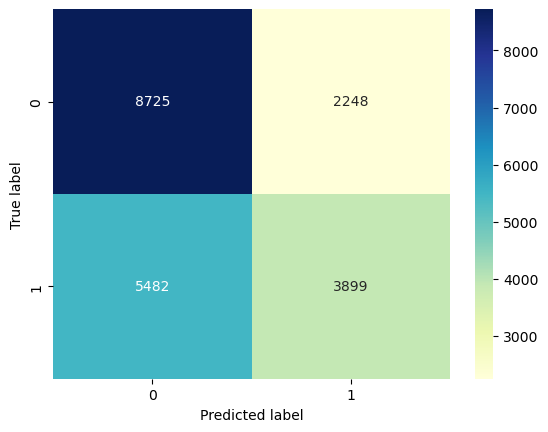

array([[8725, 2248],
       [5482, 3899]], dtype=int64)

In [19]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
cm

In [8]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of Decision Tree Model is : ", accuracy)


 Accuracy of this Model is :  0.6202220693721135


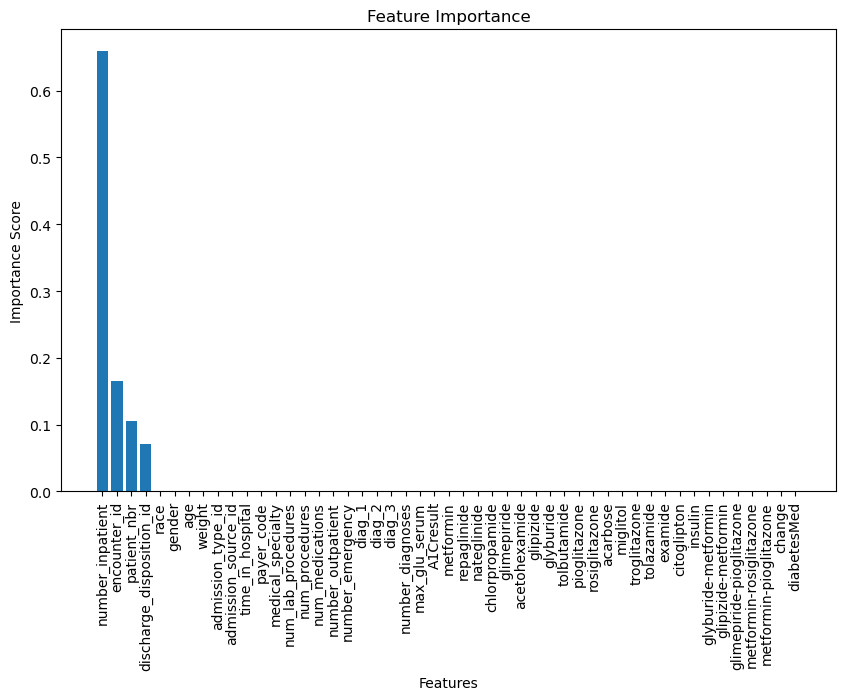

In [25]:
importances = decision_tree.feature_importances_
feature_names = x_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()

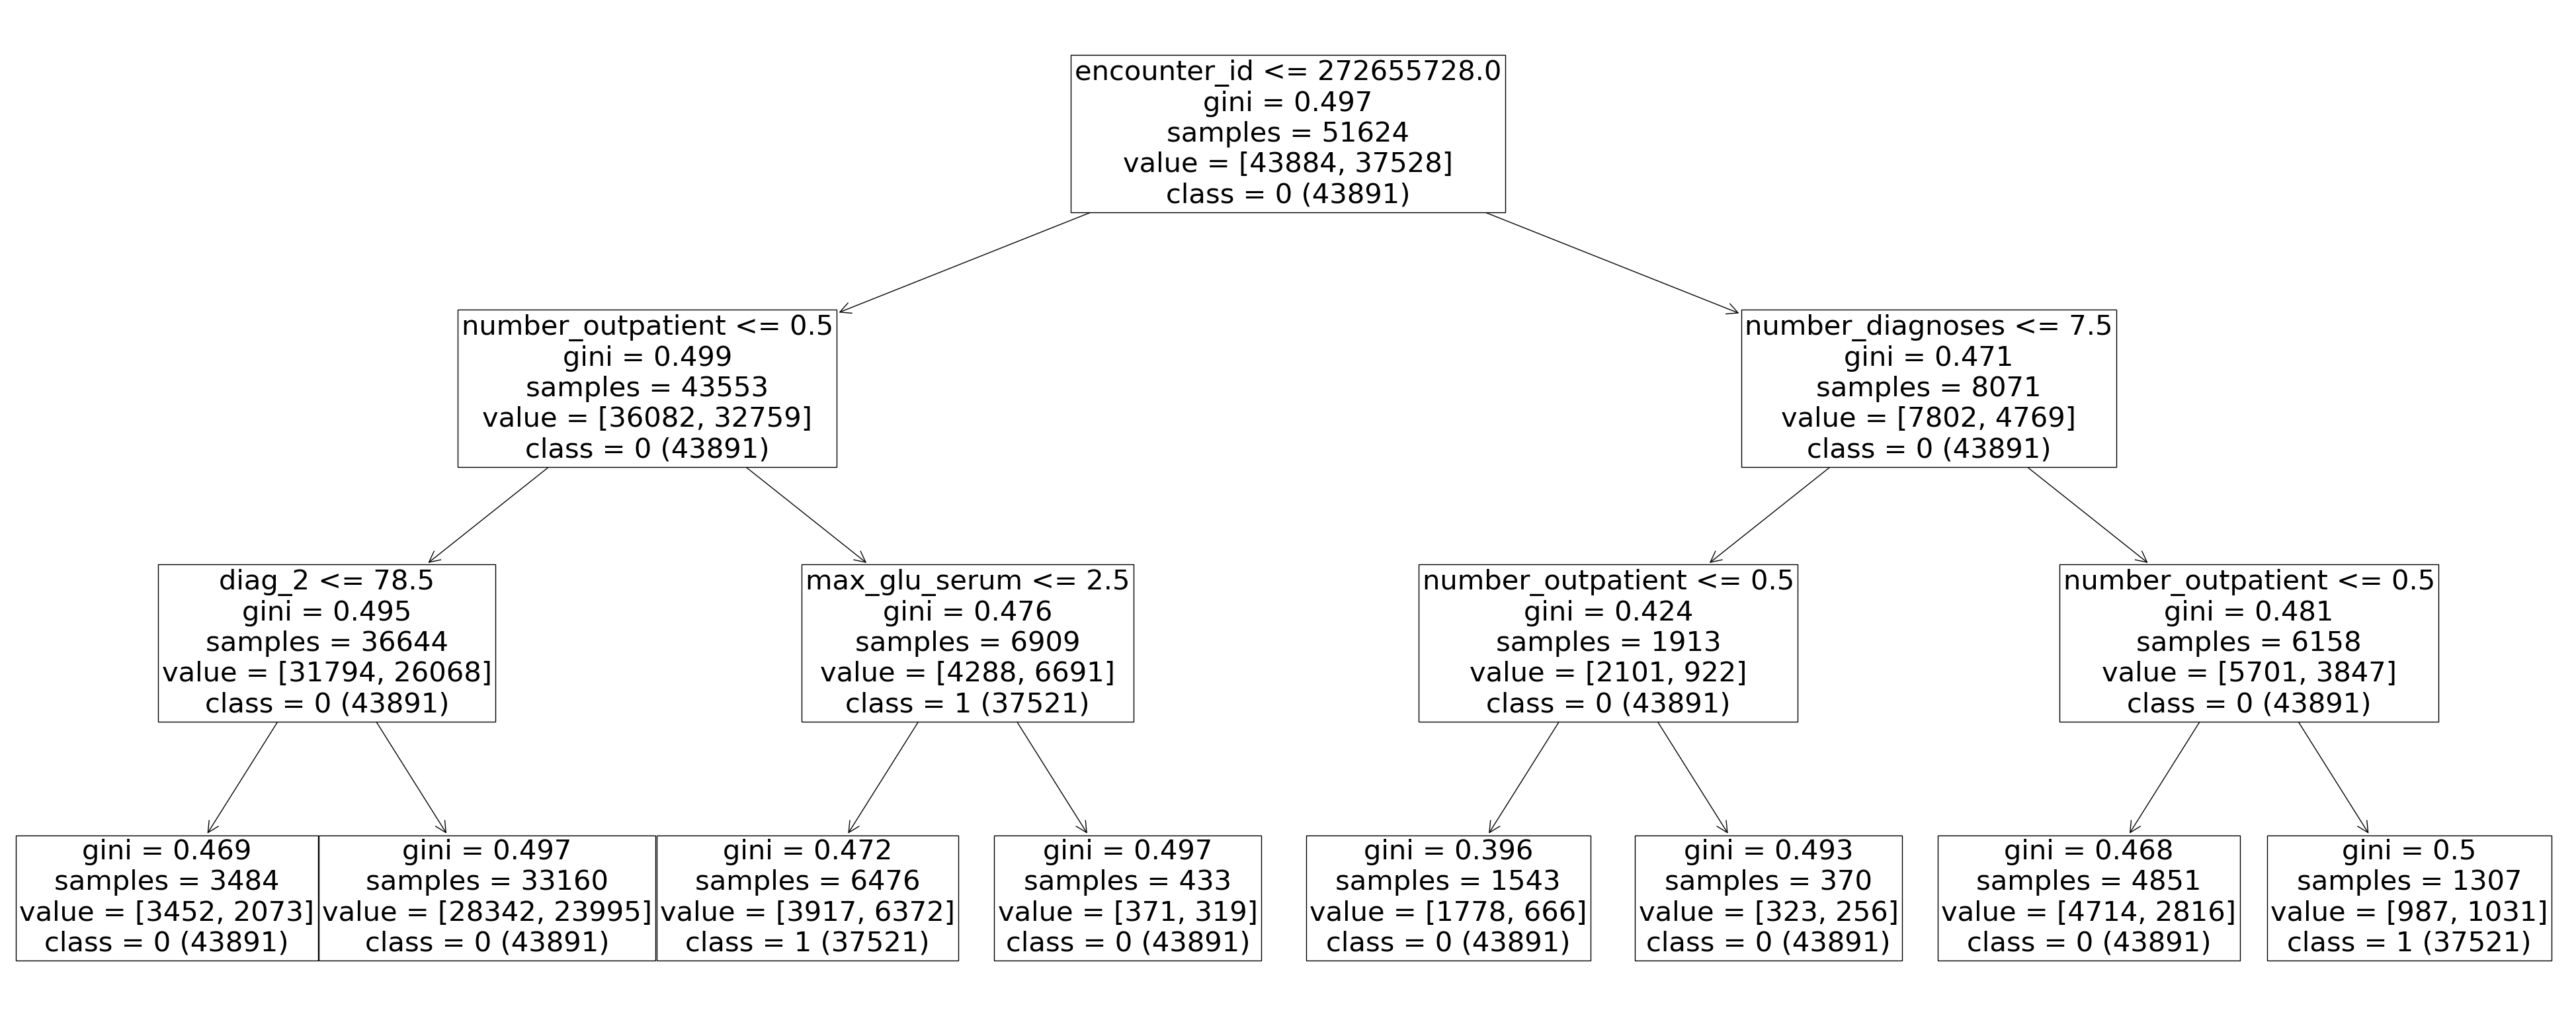

In [9]:
# Random Forest Model
target = 'readmitted'

# Setting x and y for train and test sets
x = dataset.drop(['readmitted'], axis=1)
y = dataset['readmitted']

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Creating and fitting the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=3, random_state=0)
random_forest.fit(x_train, y_train)
# Choose a tree from the forest to plot (e.g., the first tree)
tree_to_plot = random_forest.estimators_[0]
# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
plot_tree(tree_to_plot, feature_names= x_train.columns,class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
plt.show()

# Predicting on the test set
y_pred = random_forest.predict(x_test)

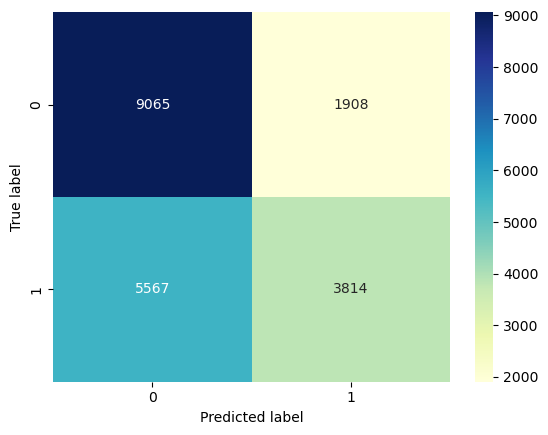

In [10]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [11]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of Random Forest Model is : ", accuracy)


 Accuracy of this Model is :  0.6327503193475484
